    "Quick Chargers": Sessions with short durations and high charging rates.
    
    "Extended Sessions": Sessions that last longer and involve slower charging rates.
    
    "Off-Peak Chargers": Sessions that primarily occur during non-peak hours.
    
    "Weekend Chargers": Sessions that are more common on weekends.
    
    "Rapid Chargers": Sessions characterized by a high charging rate, regardless of duration.

    "Night Owls": Charging sessions that predominantly occur during nighttime hours.

    "Daytime Chargers": Sessions concentrated during daylight hours.

    "Intermittent Chargers": Sessions with frequent start-stop patterns, suggesting sporadic usage.

    "High Utilizers": Users or sessions with consistently high charging demand.

    "Low Utilizers": Users or sessions with consistently low charging demand.

    "Morning Commuters": Sessions that commonly occur during morning rush hours.

    "Afternoon Surges": Clusters with increased charging demand in the afternoon.

    "Weekday Warriors": High-demand sessions on weekdays, potentially indicating work-related charging.

    "Holiday Chargers": Sessions with distinct patterns during public holidays.

    "Energy Savers": Sessions that exhibit efforts to charge during lower energy cost periods.

    "Regular Routines": Sessions with predictable and consistent patterns.

    "Irregular Patterns": Clusters with unpredictable charging behavior.

    "Peak Load Chargers": Sessions contributing to high energy demand during peak load times.

    "Efficiency Seekers": Users optimizing for faster charging or energy efficiency.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
original_data = pd.read_pickle("preparedData.pkl")
data = original_data.copy()

In [3]:
print(data['connectionTime'].max())
print(data['connectionTime'].min())

2021-09-14 05:43:39+00:00
2018-04-25 13:45:10+00:00


In [4]:
data = data[(data['disconnectTime'] < "2020-04-01") ^ (data['disconnectTime'] >= "2021-01-01")].copy()
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [5]:
print(data['connectionTime'].max())
print(data['connectionTime'].min())

2021-09-14 05:43:39+00:00
2018-04-25 13:45:10+00:00


In [6]:
#data = data[data["siteID"] == 1].copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54628 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          54628 non-null  datetime64[ns, UTC]
 1   disconnectTime          54628 non-null  datetime64[ns, UTC]
 2   doneChargingTime        54628 non-null  datetime64[ns, UTC]
 3   kWhDelivered            54628 non-null  float64            
 4   siteID                  54628 non-null  int64              
 5   userID                  39442 non-null  float64            
 6   combinedSpaceStationID  54628 non-null  object             
 7   timeConnected           54628 non-null  float64            
 8   idleTime                54628 non-null  float64            
 9   chargingTime            54628 non-null  float64            
 10  weekday                 54628 non-null  int32              
 11  month                   54628 non-null  int32 

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39442 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          39442 non-null  datetime64[ns, UTC]
 1   disconnectTime          39442 non-null  datetime64[ns, UTC]
 2   doneChargingTime        39442 non-null  datetime64[ns, UTC]
 3   kWhDelivered            39442 non-null  float64            
 4   siteID                  39442 non-null  int64              
 5   userID                  39442 non-null  float64            
 6   combinedSpaceStationID  39442 non-null  object             
 7   timeConnected           39442 non-null  float64            
 8   idleTime                39442 non-null  float64            
 9   chargingTime            39442 non-null  float64            
 10  weekday                 39442 non-null  int32              
 11  month                   39442 non-null  int32 

In [10]:
data['connectionTime'] = data['connectionTime'].dt.tz_convert(tz='Etc/GMT-8')
data['disconnectTime'] = data['disconnectTime'].dt.tz_convert(tz='Etc/GMT-8')
data['doneChargingTime'] = data['doneChargingTime'].dt.tz_convert(tz='Etc/GMT-8')
data["ConnectionHour"] = data['connectionTime'].dt.hour
data["weekday"] = data["connectionTime"].dt.day_of_week

In [11]:
# Berechne die gesamte zur Verfügung stehende Zeit in der Woche in Minuten
total_time_in_week = 7 * 24 * 60  # 7 Tage * 24 Stunden * 60 Minuten
data["progressInWeek"] = (data["weekday"] * 24 * 60 + data["ConnectionHour"] * 60 + data['connectionTime'].dt.minute) / total_time_in_week

In [12]:
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,...,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,ConnectionHour,progressInWeek
0,2020-01-02 21:08:54+08:00,2020-01-03 03:11:15+08:00,2020-01-03 01:31:35+08:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,...,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",21,0.554365
1,2020-01-02 21:36:50+08:00,2020-01-03 06:38:21+08:00,2020-01-03 04:18:05+08:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,...,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",21,0.557143
2,2020-01-02 21:56:35+08:00,2020-01-03 08:39:22+08:00,2020-01-03 00:35:06+08:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,...,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",21,0.559127
3,2020-01-02 21:59:58+08:00,2020-01-03 00:38:39+08:00,2020-01-02 23:18:45+08:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,...,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",21,0.559425
4,2020-01-02 22:00:01+08:00,2020-01-03 06:08:40+08:00,2020-01-03 02:17:30+08:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,...,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",22,0.559524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-02 03:13:11+08:00,2019-07-02 08:44:40+08:00,2019-07-02 05:13:56+08:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,...,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT",3,0.162004
56532,2019-07-02 03:43:46+08:00,2019-07-02 10:58:53+08:00,2019-07-02 10:43:53+08:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,...,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT",3,0.164980
56533,2019-07-02 04:34:30+08:00,2019-07-02 08:30:52+08:00,2019-07-02 05:27:44+08:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,...,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT",4,0.170040
56534,2019-07-02 05:49:12+08:00,2019-07-02 09:37:18+08:00,2019-07-02 07:14:33+08:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,...,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT",5,0.177480


In [13]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.describe()

,kWhDelivered,siteID,userID,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable,ConnectionHour,progressInWeek
count,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000,39442.000000
mean,12.977608,1.354952,1681.650525,24962.096851,11884.518153,13077.578698,2.458217,6.155114,364.712362,24.039127,70.515593,356.879773,12.842909,0.430543
std,10.553755,0.478505,2518.323561,15472.997096,13215.111597,10047.105076,1.612098,3.632803,103.172112,20.366442,59.666766,189.715460,9.393818,0.218315
min,0.503000,1.000000,1.000000,183.000000,0.000000,61.000000,0.000000,1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.904000,1.000000,436.000000,14183.750000,1360.250000,6624.250000,1.000000,3.000000,291.000000,11.340000,30.000000,194.000000,3.000000,0.274405
50%,10.043000,1.000000,743.000000,27093.500000,9469.500000,10709.000000,2.000000,6.000000,364.000000,17.520000,50.000000,360.000000,15.000000,0.424405
75%,15.539000,2.000000,1707.000000,34174.750000,19870.000000,17358.000000,4.000000,10.000000,400.000000,30.000000,100.000000,503.000000,22.000000,0.582143
max,75.528000,2.000000,19923.000000,771559.000000,562037.000000,720057.000000,6.000000,12.000000,2000.000000,215.320000,480.000000,1913.000000,23.000000,0.999603


In [16]:
cluster_data = pd.DataFrame()
cluster_data['progressInWeek'] = numeric_data['progressInWeek']
cluster_data['kWhDelivered'] = numeric_data['kWhDelivered']

In [17]:
cluster_data

,progressInWeek,kWhDelivered
0,0.554365,25.016
1,0.557143,33.097
2,0.559127,6.521
3,0.559425,2.355
4,0.559524,13.375
...,...,...
56531,0.162004,6.048
56532,0.164980,41.047
56533,0.170040,5.390
56534,0.177480,8.399


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cluster_data)
cluster_data_scaled = scaler.transform(cluster_data)
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled, columns=cluster_data.columns, index=cluster_data.index)
cluster_data_scaled_df.describe()

,progressInWeek,kWhDelivered
count,3.944200e+04,3.944200e+04
mean,3.458856e-17,-3.458856e-17
std,1.000013e+00,1.000013e+00
min,-1.972146e+00,-1.182022e+00
25%,-7.152072e-01,-6.702541e-01
50%,-2.811706e-02,-2.780665e-01
75%,6.944182e-01,2.427027e-01
max,2.606637e+00,5.926913e+00


In [20]:
from sklearn.cluster import KMeans

In [21]:
k_max = 25  # We have a lot of datapoints, however more than 25 clusters are definitely
            # not reasonable!

In [22]:
#These lines initialize two empty lists to store the number of clusters (clusters) and the
#corresponding inertia (sum of squared distances to the nearest cluster center) for each k value (losses)
clusters = []
losses = []

#This is a loop that iterates over different values of k
for k in range(k_max):
    #For each k, a new instance of the KMeans clustering algorithm is created. The n_clusters parameter is set to k+1 to specify the number of clusters, and n_init='auto' indicates
    #that the algorithm should automatically choose the number of initializations for the centroids
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(cluster_data_scaled)
    clusters.append(k+1)

    #The inertia of the fitted model is calculated using the inertia_ attribute, representing the sum of squared distances to the nearest cluster center.
    #This value is then appended to the losses list
    losses.append(model.inertia_)

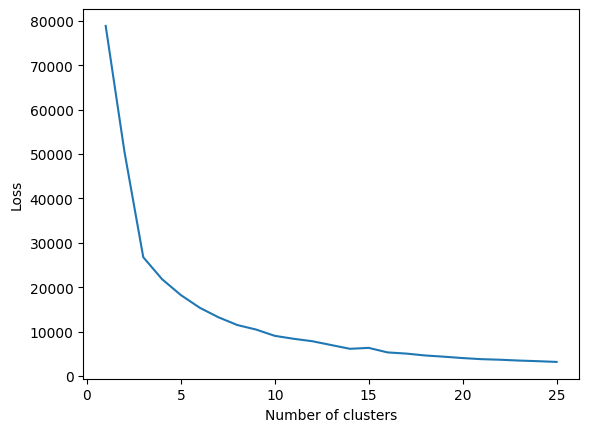

In [23]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 6.0)

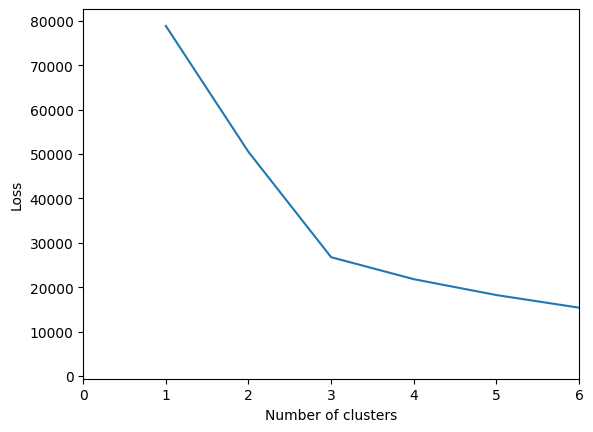

In [25]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [26]:
numbers = ["zero", "one", "two"]

sessions_scaled = cluster_data_scaled_df.copy()
three_means = KMeans(n_clusters=3, n_init='auto')
three_means.fit(cluster_data_scaled)

KMeans(n_clusters=3, n_init='auto')

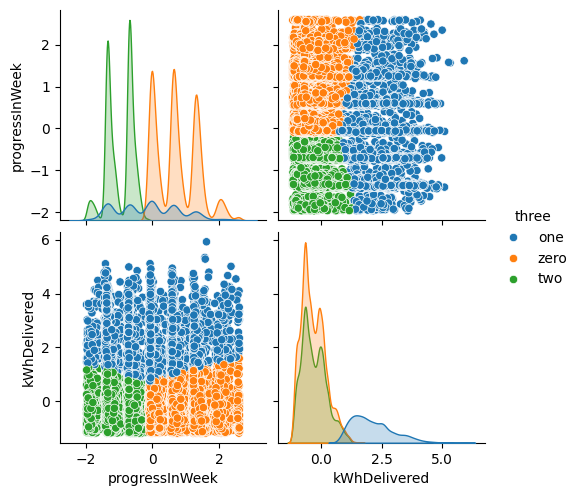

In [27]:
sessions_scaled["three"] = three_means.predict(cluster_data_scaled)
sessions_scaled["three"] = sessions_scaled["three"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="three")

In [28]:
cluster_sizes = sessions_scaled["three"].value_counts()
print("\nNumber of Datapoints in Each Cluster:")
print(cluster_sizes)


Number of Datapoints in Each Cluster:
three
zero    19941
two     14166
one      5335
Name: count, dtype: int64


In [29]:
average_efficiency_by_cluster = sessions_scaled.groupby('three')['kWhDelivered'].mean()
average_efficiency_by_cluster

three
one     2.099056
two    -0.313637
zero   -0.338773
Name: kWhDelivered, dtype: float64

Cut-Off 1

In [54]:
cluster_data = pd.DataFrame()
cluster_data['kWhDelivered'] = numeric_data['kWhDelivered']
cluster_data['kWhRequested'] = numeric_data['kWhRequested']

In [55]:
cluster_data

,kWhDelivered,kWhRequested
0,25.016,25.00
1,33.097,70.00
2,6.521,8.00
3,2.355,8.00
4,13.375,16.00
...,...,...
56531,6.048,8.25
56532,41.047,36.96
56533,5.390,12.00
56534,8.399,32.00


In [56]:
scaler = StandardScaler()
scaler.fit(cluster_data)
cluster_data_scaled = scaler.transform(cluster_data)
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled, columns=cluster_data.columns, index=cluster_data.index)
cluster_data_scaled_df.describe()

,kWhDelivered,kWhRequested
count,3.944200e+04,3.944200e+04
mean,-3.458856e-17,2.997675e-16
std,1.000013e+00,1.000013e+00
min,-1.182022e+00,-1.180345e+00
25%,-6.702541e-01,-6.235399e-01
50%,-2.780665e-01,-3.200957e-01
75%,2.427027e-01,2.926848e-01
max,5.926913e+00,9.392082e+00


In [57]:
#These lines initialize two empty lists to store the number of clusters (clusters) and the
#corresponding inertia (sum of squared distances to the nearest cluster center) for each k value (losses)
clusters = []
losses = []

#This is a loop that iterates over different values of k
for k in range(k_max):
    #For each k, a new instance of the KMeans clustering algorithm is created. The n_clusters parameter is set to k+1 to specify the number of clusters, and n_init='auto' indicates
    #that the algorithm should automatically choose the number of initializations for the centroids
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(cluster_data_scaled)
    clusters.append(k+1)

    #The inertia of the fitted model is calculated using the inertia_ attribute, representing the sum of squared distances to the nearest cluster center.
    #This value is then appended to the losses list
    losses.append(model.inertia_)

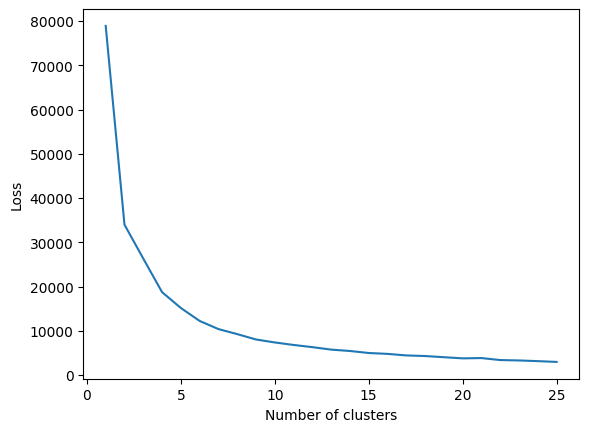

In [58]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 6.0)

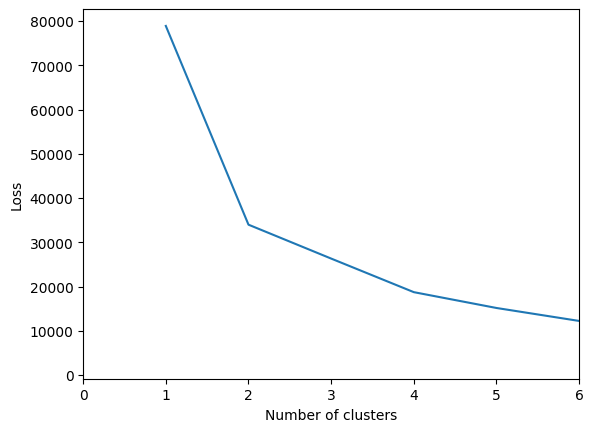

In [59]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [60]:
numbers = ["zero", "one", "two", "three"]

sessions_scaled = cluster_data_scaled_df.copy()
two_means = KMeans(n_clusters=2, n_init='auto')
two_means.fit(cluster_data_scaled)

KMeans(n_clusters=2, n_init='auto')

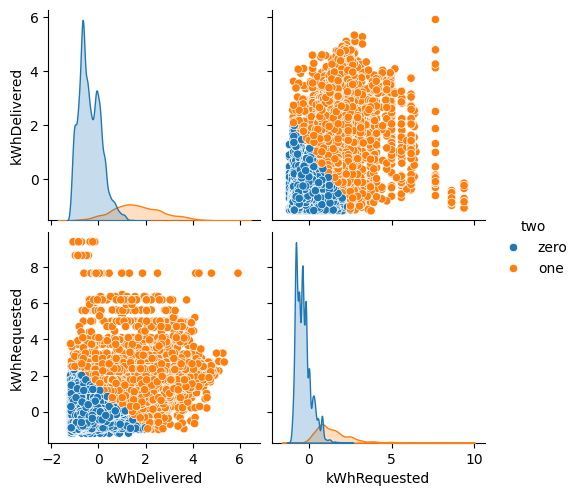

In [61]:
sessions_scaled["two"] = two_means.predict(cluster_data_scaled)
sessions_scaled["two"] = sessions_scaled["two"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="two")

In [62]:
cluster_sizes = sessions_scaled["two"].value_counts()
print("\nNumber of Datapoints in Each Cluster:")
print(cluster_sizes)


Number of Datapoints in Each Cluster:
two
zero    32251
one      7191
Name: count, dtype: int64


In [41]:
#average_efficiency_by_cluster = sessions_scaled.groupby('three')['idleTime'].mean()
#average_efficiency_by_cluster

Cut-Off2

In [42]:
cluster_data = pd.DataFrame()
cluster_data['progressInWeek'] = numeric_data['progressInWeek']
cluster_data['efficiency'] = numeric_data['chargingTime'] / numeric_data['timeConnected']

In [43]:
cluster_data

,progressInWeek,efficiency
0,0.554365,0.724944
1,0.557143,0.740974
2,0.559127,0.246610
3,0.559425,0.496481
4,0.559524,0.526928
...,...,...
56531,0.162004,0.364272
56532,0.164980,0.965526
56533,0.170040,0.225215
56534,0.177480,0.374178


In [45]:
scaler = StandardScaler()
scaler.fit(cluster_data)
cluster_data_scaled = scaler.transform(cluster_data)
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled, columns=cluster_data.columns, index=cluster_data.index)
cluster_data_scaled_df.describe()

,progressInWeek,efficiency
count,3.944200e+04,3.944200e+04
mean,3.458856e-17,-1.787076e-16
std,1.000013e+00,1.000013e+00
min,-1.972146e+00,-1.983638e+00
25%,-7.152072e-01,-8.695534e-01
50%,-2.811706e-02,-8.538510e-02
75%,6.944182e-01,1.067231e+00
max,2.606637e+00,1.344636e+00


In [46]:
#These lines initialize two empty lists to store the number of clusters (clusters) and the
#corresponding inertia (sum of squared distances to the nearest cluster center) for each k value (losses)
clusters = []
losses = []

#This is a loop that iterates over different values of k
for k in range(k_max):
    #For each k, a new instance of the KMeans clustering algorithm is created. The n_clusters parameter is set to k+1 to specify the number of clusters, and n_init='auto' indicates
    #that the algorithm should automatically choose the number of initializations for the centroids
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(cluster_data_scaled)
    clusters.append(k+1)

    #The inertia of the fitted model is calculated using the inertia_ attribute, representing the sum of squared distances to the nearest cluster center.
    #This value is then appended to the losses list
    losses.append(model.inertia_)

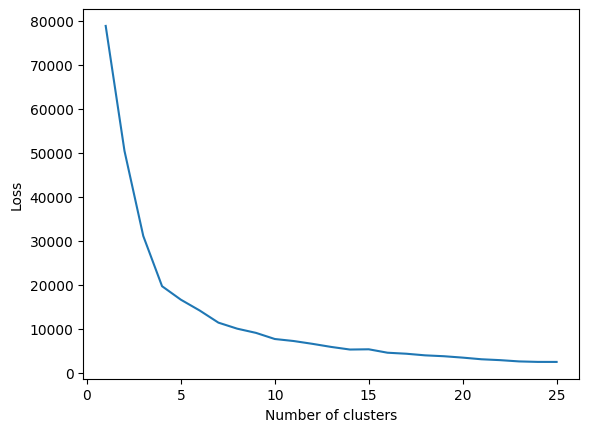

In [47]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 6.0)

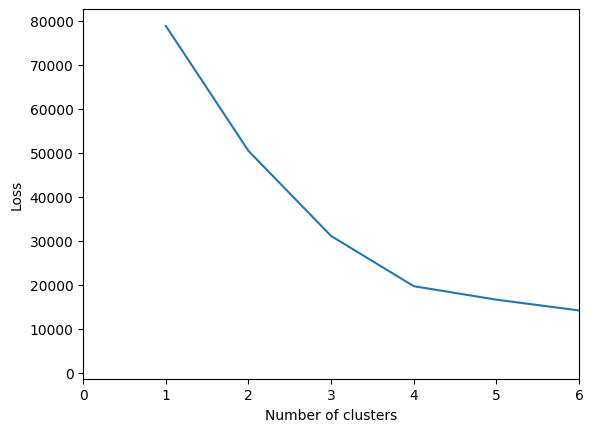

In [49]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [50]:
numbers = ["zero", "one", "two", "three"]

sessions_scaled = cluster_data_scaled_df.copy()
four_means = KMeans(n_clusters=4, n_init='auto')
four_means.fit(cluster_data_scaled)

KMeans(n_clusters=4, n_init='auto')

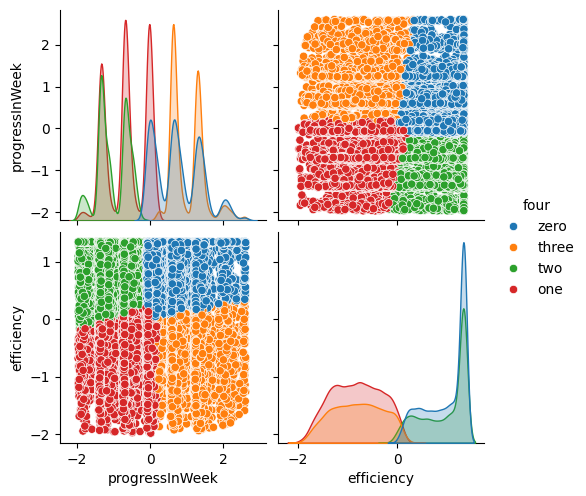

In [51]:
sessions_scaled["four"] = four_means.predict(cluster_data_scaled)
sessions_scaled["four"] = sessions_scaled["four"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="four")

In [52]:
cluster_sizes = sessions_scaled["four"].value_counts()
print("\nNumber of Datapoints in Each Cluster:")
print(cluster_sizes)


Number of Datapoints in Each Cluster:
four
one      12873
zero     10131
three     8576
two       7862
Name: count, dtype: int64


In [53]:
average_efficiency_by_cluster = sessions_scaled.groupby('four')['efficiency'].mean()
average_efficiency_by_cluster

four
one     -0.818750
three   -0.796763
two      0.944698
zero     0.981698
Name: efficiency, dtype: float64